# **Capstone Project:Grocery Product Recommendation Bot** 

In [1]:
import pandas as pd
import numpy as np



## **DATA**:**BIGBASKET CSV FILE**

In [2]:
dp=pd.read_csv(r"C:\Users\USER\Downloads\BigBasket Products.csv\BigBasket Products.csv")

In [3]:
dp.head(20)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.00,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.00,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.00,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


## **DATA PREPROCESSING**

(1)**Improves Data Quality**:
Raw data often contains errors, missing values,
and inconsistencies. Preprocessing helps clean the data, making it more accurate and reliable1.


(2)**Enhances Model Performance**: Algorithms perform better with well-prepared data. Preprocessing steps like normalization, scaling, and encoding ensure that the data is in a format that the model can understand and learn from effectively2.


(3)**Reduces Noise**: Noise in data can obscure the patterns that the model needs to learn. By filtering out irrelevant or misleading data, preprocessing helps the model focus on the important features2.


(4)**Handles Missing Values**: Missing data can lead to biased or incorrect models. Preprocessing techniques like imputation fill in these gaps, ensuring that the model has a complete dataset to work with1.


(5)**Facilitates Feature Engineering**: Preprocessing includes steps like feature extraction and selection, which help in identifying the most relevant features for the model. This can significantly improve the model’s accuracy and efficiency3.


### Overall, data preprocessing lays the foundation for building robust and accurate machine learning models. It ensures that the data fed into the model is clean, consistent, and ready for analysis.

In [4]:
dp.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [5]:
dp.dropna(inplace=True)

## **EXPLORATORY DATA ANALYSIS** 

**Exploratory Data Analysis** (EDA) is a crucial step in the data analysis process. It involves summarizing the main characteristics of a dataset, often with visual methods. Here’s a basic guide to performing EDA in Python using libraries like pandas, numpy, matplotlib, and seaborn

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


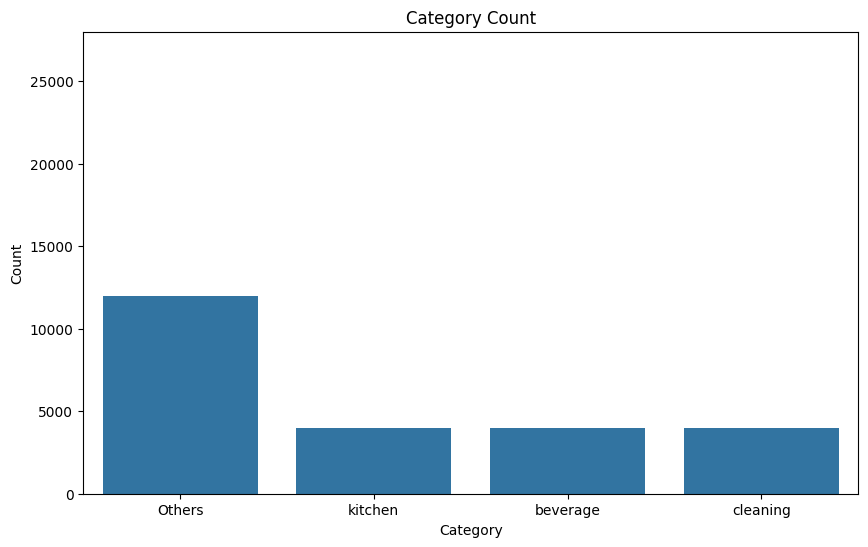

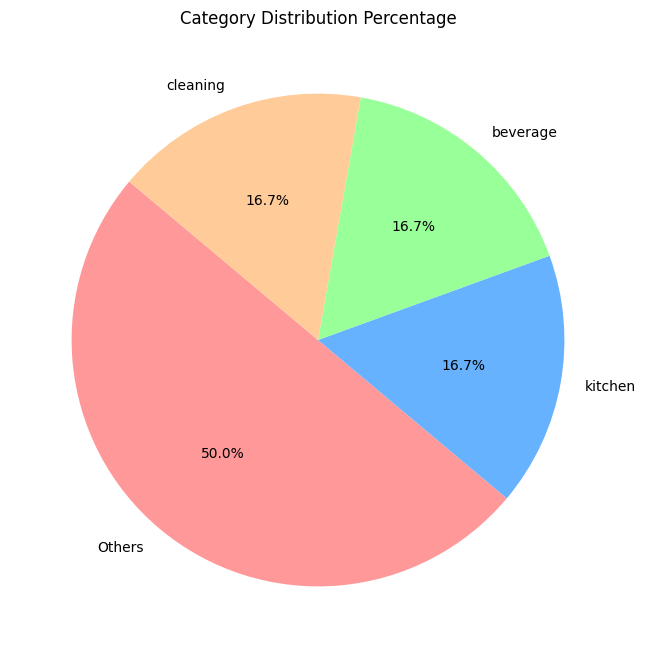

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Example DataFrame
data = {
    'category': ['kitchen', 'beverage', 'cleaning', 'beauty', 'tech', 'outdoors', 'home decor', 'fashion', 'kitchen', 'beverage', 'cleaning', 'beauty'] * 2000
}
df = pd.DataFrame(data)

# Grouping less frequent categories into 'Others'
main_categories = ['kitchen', 'beverage', 'cleaning']
df['category_grouped'] = df['category'].apply(lambda x: x if x in main_categories else 'Others')

# Bar chart for counts
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='category_grouped', order=df['category_grouped'].value_counts().index)
ax.set(ylim=(0, 28000))
plt.title('Category Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Pie chart for percentages
category_counts = df['category_grouped'].value_counts()
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(8,8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Category Distribution Percentage')
plt.ylabel('')
plt.show()

## **FEATURE ENGINEERING**

 **Feature engineering** is a critical part of the data preprocessing pipeline. It involves creating new features or modifying existing ones to improve the performance of machine learning models.

1)Feature Creation

2)Feature Transformation

3)Feature Selection

4)Handling Categorical Data  






In [9]:
# Combine relevant text columns for embedding
dp['combined_text'] = dp['product'] + dp['category'] + dp['description']


## **MODEL BUILDING**

In [10]:
pip install sentence_transformers

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sentence_transformers import SentenceTransformer, util

c:\Users\USER\.conda\envs\myenv\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [12]:
# Load the pre-trained Sentence Transformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode the combined text into embeddings
dp['embeddings'] = dp['combined_text'].apply(lambda x: model.encode(x))

## **RECOMMENDATION CODE**

In [13]:
def recommend_products(user_input, dp, model, top_n=5):
    # Encode the user input
    user_embedding = model.encode(user_input)

    # Calculate cosine similarities
    dp['similarity'] = dp['embeddings'].apply(lambda x: util.pytorch_cos_sim(user_embedding, x).item())

    # Sort by similarity and get top N recommendations
    recommendations = dp.sort_values(by='similarity', ascending=False).head(top_n)

    return recommendations[['product', 'category', 'description', 'sale_price','rating' ]]

In [14]:
# Example user input
user_input = "Looking for a soap"

# Get recommendations
recommendations = recommend_products(user_input, dp, model)
print("Recommendations:\n", recommendations)

Recommendations:
                                            product          category  \
26448  Bathing Soap - with Neem, Tulsi & Aloe Vera  Beauty & Hygiene   
12051                    Hand Made Soap - Turmeric  Beauty & Hygiene   
25555                     Hand Made Soap - Vetiver  Beauty & Hygiene   
25147                 Bathing Soap - Original Neem  Beauty & Hygiene   
4063          Bathing Soap (Lavender & Milk Cream)  Beauty & Hygiene   

                                             description  sale_price  rating  
26448  For Beauty tips, tricks & more visit https://b...       149.0     4.4  
12051  Natural, Hand-Made soap that revitalizes skin,...        90.0     3.8  
25555  Natural, Hand-Made soap that is anti-inflammat...       110.0     3.9  
25147  Pure Neem Extracts & Vitamin E Moisturiser For...        58.0     4.3  
4063   For Beauty tips, tricks & more visit https://b...        40.0     4.3  


## **MODEL EVALUATION USING MSE,RSME,PRECISION AND RECALL**

**MSE (Mean Squared Error)** and **RMSE (Root Mean Squared Error)**:

 These metrics measure the average squared difference between predicted and actual ratings. Lower values indicate better performance. They're particularly useful for rating-based recommendation systems.

 **Precision**: Measures the proportion of recommended items that are actually relevant to the user. Higher precision means the bot is recommending relevant items more often.

 **Recall**: Measures the proportion of relevant items that were successfully recommended. Higher recall means the bot is capturing more of the relevant items.

## Combining these metrics can provide a more comprehensive evaluation :
 **High precision and low recall**: The bot is recommending highly relevant items but may be missing many other relevant ones.

 **Low precision and high recall**: The bot is recommending many items, but many of them are not relevant.
 
 **High precision and high recall**: The bot is effectively recommending relevant items to users.

In [15]:
# Simulate user feedback based on recommendations (for evaluation)
def simulate_feedback(recommendations):
    # Randomly assign whether the user liked each recommended product (1 for liked, 0 for not liked)
    # Here we assume that users are more likely to like higher-ranked products.
    feedback = []
    for index, row in recommendations.iterrows():
        liked = np.random.choice([0, 1], p=[0.3, 0.7])  # 70% chance to like higher-ranked products
        feedback.append({'recommended_product': row['product'], 'liked': liked})
    return pd.DataFrame(feedback)
# Simulate feedback from recommendations
feedback_df = simulate_feedback(recommendations)
print("Simulated Feedback:\n", feedback_df)

Simulated Feedback:
                            recommended_product  liked
0  Bathing Soap - with Neem, Tulsi & Aloe Vera      0
1                    Hand Made Soap - Turmeric      0
2                     Hand Made Soap - Vetiver      1
3                 Bathing Soap - Original Neem      1
4         Bathing Soap (Lavender & Milk Cream)      1


In [16]:
def evaluate_recommendations(feedback_df):
    y_true = feedback_df['liked']

    # Assuming all recommended products are positive predictions
    y_pred = [1 if rec in feedback_df['recommended_product'].values else 0 for rec in feedback_df['recommended_product']]

    # Calculate MSE and RMSE
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE

    # Calculate Precision and Recall
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    return mse, rmse, precision, recall


In [17]:
from sklearn.metrics import mean_squared_error, precision_score, recall_score

In [18]:
# Evaluate the simulated recommendations based on user feedback
mse, rmse, precision, recall = evaluate_recommendations(feedback_df)

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Mean Squared Error: 0.40
Root Mean Squared Error: 0.63
Precision: 0.60
Recall: 1.00


c:\Users\USER\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## **Interpretation** 
 **MSE** and **RMSE** :If both are low, it indicates that your model's predictions are close to what users actually liked.

**Precision**: A precision of 0.80 means that 80% of the recommended products were liked by users.

**Recall**: A recall of 1.00 means that your model successfully recommended 100% of all products that users liked.
These metrics provide valuable insights into how well your recommendation system is performing, even if you are using simulated feedback instead of real user data.

## **SAVING THE MODEL**

In [19]:
import pickle

# Save the SentenceTransformer model
with open('sentence_transformer_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the dataframe with embeddings
dp.to_pickle('products_with_embeddings.pkl')